References
- http://www.deeplearningbook.org/    

- import what you need

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
from functions_04 import *

<font size="15">Overviews</font>
1. Introduction
1. Flow
1. Underfitting
1. Overfitting
1. Regularization
1. Summary

---

# Introduction
- In this notebook, we want to explain **Underfitting** and **Overfitting**.
- as [this renowned book](http://www.deeplearningbook.org/contents/ml.html) says
> Underfitting: the model is not able to obtain a sufficiently low error value on the training set \
> Overfitting: the gap between the training error and test error is too large
- In other words, underfitting is not enough to be optimized on the training data, and overfitting is the model learned on the training dataset in an unexpected way. 
- I will explain the detail in its section.

---
# Flow
- First of all, I'm going to explain how I trained/processed the model.

## Data
- I assumed the training data is generated by the distribution based on $y=x^2$, and there's no noise in it.
- the function of the training set
$$
y = x^2
$$

Text(0, 0.5, 'y')

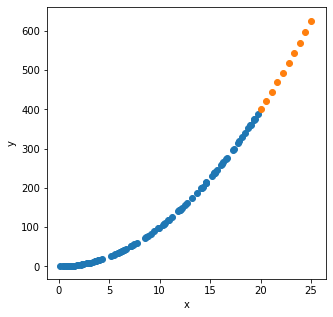

In [4]:
# data preparation
x, y, x_test, y_test = data_generator(num=100, test_num=10)

# data visualization
plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.scatter(x_test, y_test)
plt.xlabel("x")
plt.ylabel("y")

## Polynomial Regression
- root mean squared error
$$
RMSE(y_{pred}, y_{true}) = \sqrt{\frac{1}{n}\sum_{l=1}^n (y_{pred}-y_{true})^2}
$$
- where $n$ is \# of data, $y_{pred}$ is predicted output "y", $y_{true}$ is given(true) output "y".
---

- Linear regression is the simplest model for machine learning.
- y is predicted using formula below:
$$
y_{pred} = a_0 + a_1x
$$
- where $a_i$ is a trainable coefficient and $x$ is a valuable.

---

- in this notebook, I include polynomial regression as well.
- y is predicted using formula below:
$$
% y_{pred} = a_0 + a_1x 
y_{pred} = \sum_{l=0}^n a_l x^l \\
y_{pred} = a_0 + a_1x + a_2x^2 + a_3x^3 .... + a_nx^n
$$
- where $n$ is degree and indicates the complexity(ability) of the model.

In [5]:
#--- parameter ---#
degree = 8 # degree of polynomial fuction, complexity of the model.
#-----------------#

# Define model
pf = PolynomialFeatures(degree=degree, include_bias=False)
model = LinearRegression()

# train the model on the training dataset
x_ = pf.fit_transform(x)
model.fit(x_, y)
print()

In [6]:
# observe the error on the training set
print()
x_ = pf.fit_transform(x)
y_pred = model.predict(x_)
print(f"train loss: {rmse(y_pred, y)}")

print()
# observe the error on the test set
x_ = pf.fit_transform(x_test)
y_pred = model.predict(x_)
print(f"test loss: {rmse(y_pred, y_test)}")


train loss: 8.756866333046472e-07

test loss: 3.656420230248061e-06


In [7]:
# observe the coefficient of the predicted fuction
print()
data = []
line = np.reshape(np.linspace(0, x.max()+1, 100), (100, 1))
y_predict = f(line, model)
y_true = f_true(line)

coef = np.reshape(model.coef_.reshape(-1), (1, -1))
for i in range(coef.shape[1]):
    print(f"coefficient {i+1} = {coef[0,i]}")


coefficient 1 = 5.458695455220796e-07
coefficient 2 = 0.9999999093649081
coefficient 3 = 8.171118751895403e-09
coefficient 4 = -2.257908092808715e-10
coefficient 5 = -9.606925227122892e-12
coefficient 6 = 6.616538913983838e-13
coefficient 7 = -9.26342336171615e-15
coefficient 8 = 0.0


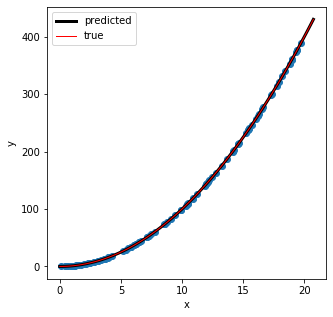

In [8]:
# visualization of the predicted and true function
plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.plot(line, y_predict, c="black", label="predicted", linewidth=3)
plt.plot(line, y_true, c="red", label="true", linewidth=1)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

---

# Underfitting
- this problem is very simple, the determined model doesn't have enough complexity/capability to solve a certain problem.
- **picture of the underfitting**

In [9]:
# define parameters
training_num = 100
degree = 1 # 1 means linear regression

# data generation
x, y, x_test, y_test = data_generator(training_num)

# model prediction
model, pf = predict_polyreg(x, y, degree)

# get errors
train_error, test_error = get_errors(pf, model, x, y, x_test, y_test)
print(f"train error: {train_error}")
print(f"test error : {test_error}")

train error: 29.50412082155759
test error : 136.5942047952198


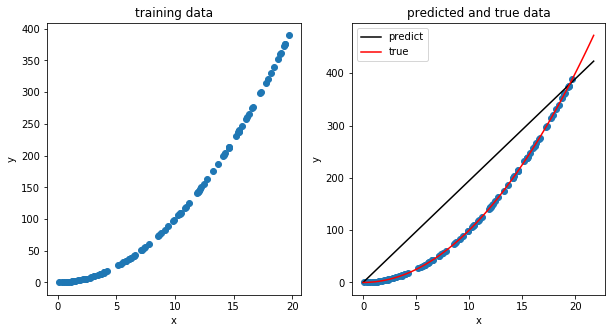

In [10]:
line = np.reshape(np.linspace(0, x.max()+2, 100), (100, 1))
y_predict = f(line, model)
y_true = f_true(line)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("training data")
ax = fig.add_subplot(1, 2, 2)
ax.scatter(x, y)
ax.plot(line, y_predict, c="black", label="predict")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()

---

---> as you can see, by using linear regression, you cannot train properly.

---

# Overfitting
- the main purpose of machine learning is to predict data from only existing data (data you have).
- in other words, we have only the training data.
- it causes the model to have learned features from the training data that are specific to it.
- it is called **Overfitting** in this field, in Japanese we call it "過学習" and it is kind of "深読み" or "偏見" for our real world.


- There are two factors that lead to Overfitting.
    - lack of the number of training data
    - the complexity of the model is too high compared to the complexity of the training set.
        - \* "the complexity of the model" = "how smart the model is"
        
        
- I will explain three way to prevent it.
    - Prepare much training data as possible.
    - Prepare the model whose capacity fits the complexity of the data.
        - Employ Regularization

## Prepare Much Training Data as Possible

### lack of training data

In [11]:
# define parameters
training_num = 5
degree = 8

# data generation
x, y, x_test, y_test = data_generator(training_num)

# model prediction
model, pf = predict_polyreg(x, y, degree)

# get errors
train_error, test_error = get_errors(pf, model, x, y, x_test, y_test)
print(f"train error: {train_error}")
print(f"test error : {test_error}")

train error: 3.188836693185347e-10
test error : 78549.78196315943


In [12]:
coef_visualizer(model)

coefficient 1 = 0.00019357816962565068
coefficient 2 = 0.0017468571832407775
coefficient 3 = 0.011161840202956448
coefficient 4 = 0.05416142473566592
coefficient 5 = 0.16148255223683142
coefficient 6 = -0.025657791989811603
coefficient 7 = 0.0014678880896015073
coefficient 8 = -2.8979227031986304e-05


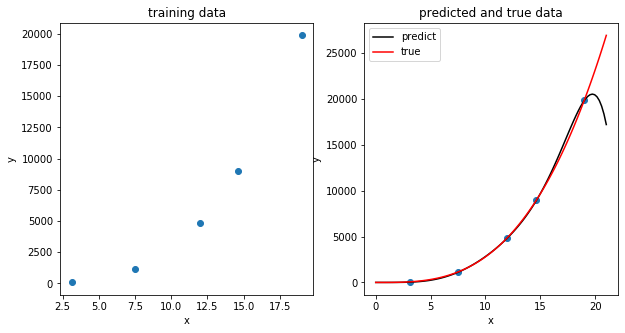

In [13]:
line = np.reshape(np.linspace(0, x.max()+2, 100), (100, 1))
y_predict = f(line, model)
y_true = f_true(line)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("training data")
ax = fig.add_subplot(1, 2, 2)
ax.scatter(x, y)
ax.plot(line, y_predict, c="black", label="predict")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()

---

--> the train accracy is very low and the test accuracy is very high. \
--> it means the model is overfitting as the definition. \
--> there are wide range of the coefs that work properly on "training set", because the training set has only 5 plots. \
--> so the model chose the coefs that reduce the train loss as possible.

---

### Plentiful training data

In [14]:
# define parameters
training_num = 100
degree = 8

# data generation
x, y, x_test, y_test = data_generator(training_num)

# model prediction
model, pf = predict_polyreg(x, y, degree)

# get errors
train_error, test_error = get_errors(pf, model, x, y, x_test, y_test)
print(f"train error: {train_error}")
print(f"test error : {test_error}")

train error: 1.5734854415857528e-06
test error : 4.253936648681837e-06


In [15]:
coef_visualizer(model)

coefficient 1 = -1.0000010856237984
coefficient 2 = -1.9999998185853267
coefficient 3 = 2.999999983467275
coefficient 4 = 4.734890359837669e-10
coefficient 5 = 1.8257360141944734e-11
coefficient 6 = -1.3116235528243259e-12
coefficient 7 = 1.9539925233402755e-14
coefficient 8 = 0.0


---
---> coefficient 2 indicates the coef of the $x^2$, and it was nearly 1 and the others result in 0.\
---> it means the model could train successfully.
---

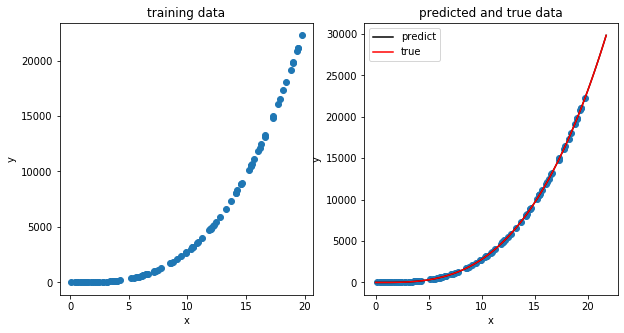

In [16]:
line = np.reshape(np.linspace(0, x.max()+2, 100), (100, 1))
y_predict = f(line, model)
y_true = f_true(line)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("training data")
ax = fig.add_subplot(1, 2, 2)
ax.scatter(x, y)
ax.plot(line, y_predict, c="black", label="predict")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()

---

--> even if the model has the same complexity as the previous model. \
--> this model could train properly. \
--> the model wouln't choose kind of the previous model's coefs.

---

## Prepare the model whose capacity fits the complexity of the data.
- to prevent overfitting, using the model with lower complexity is also important.

### the model with high capacity

In [17]:
# define parameters
training_num = 10000
degree = 15

# data generation
x, y, x_test, y_test = data_generator(training_num)

# model prediction
model, pf = predict_polyreg(x, y, degree)

# get errors
train_error, test_error = get_errors(pf, model, x, y, x_test, y_test)
print(f"train error: {train_error}")
print(f"test error : {test_error}")

train error: 35.449824442122306
test error : 2625576.451268976


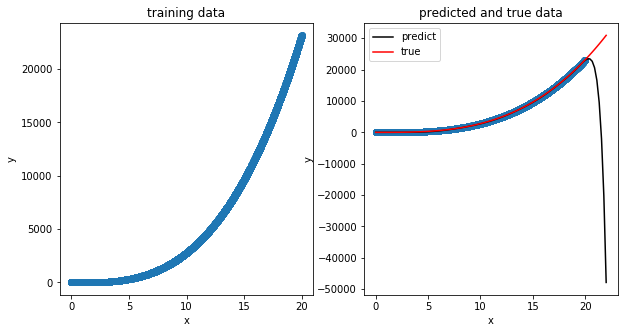

In [18]:
line = np.reshape(np.linspace(0, x.max()+2, 100), (100, 1))
y_predict = f(line, model)
y_true = f_true(line)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("training data")
ax = fig.add_subplot(1, 2, 2)
ax.scatter(x, y)
ax.plot(line, y_predict, c="black", label="predict")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()

---

---> overfitting occurs. \
---> this model's problem is almost same as previous section. \
---> choosing the model with high capacity means increasing the coefs that is plausible for the training set.\
---> so the model chose the coefs that reduce the train loss as possible.

---

### the model with low capacity

In [19]:
# define parameters
training_num = 10000
degree = 5

# data generation
x, y, x_test, y_test = data_generator(training_num)

# model prediction
model, pf = predict_polyreg(x, y, degree)

# get errors
train_error, test_error = get_errors(pf, model, x, y, x_test, y_test)
print(f"train error: {train_error}")
print(f"test error : {test_error}")

train error: 1.1346691693525243e-10
test error : 3.922054993091265e-10


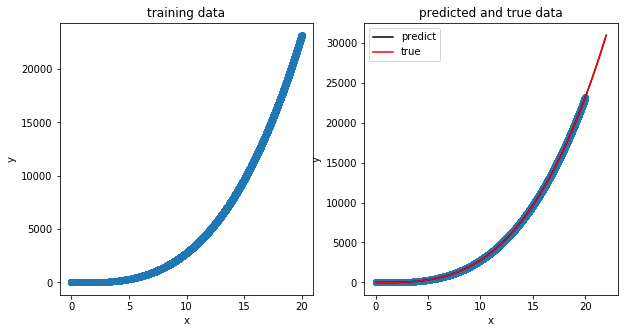

In [20]:
line = np.reshape(np.linspace(0, x.max()+2, 100), (100, 1))
y_predict = f(line, model)
y_true = f_true(line)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("training data")
ax = fig.add_subplot(1, 2, 2)
ax.scatter(x, y)
ax.plot(line, y_predict, c="black", label="predict")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()

---

--> using the model with lower capacity works properly to prevent overfitting

---

# Regularization
- in reality, we can't determine the complexity of the training set prefectly.
- in that case, you can use a regularization for the purpose of restriction of the complexity of the model.
- one of the ways to do it is restricting the weight(parameter, coef) of the model to small.

- [references](https://medium.com/@pavanmeduri1_55193/l1-l2-regularization-409039dd111a)

In [21]:
from sklearn.linear_model import Ridge, Lasso

## Ridge Regression
- in this model, restriction of the weight-squared is employed.
- the loss function will be:
$$
loss = MSE(y_{pred}, y_{true}) + \alpha |\text{W}|^2
$$
- where $\text{W}$ is the weight of the model, and $\alpha$ controlls the level of regularization

In [22]:
# define parameters
training_num = 10000
degree = 13

# data generation
x, y, x_test, y_test = data_generator(training_num)

# model prediction
linear_model, linear_pf = predict_polyreg(x, y, degree)
pf = PolynomialFeatures(degree=degree, include_bias=False)
model = Ridge(alpha=1, random_state=42) # Ridge model
x_ = pf.fit_transform(x)
model.fit(x_, y)

# get errors
train_error, test_error = get_errors(linear_pf, linear_model, x, y, x_test, y_test)
print(f"Linear: train error: {train_error}")
print(f"Linear: test  error: {test_error}")
print("")
train_error, test_error = get_errors(pf, model, x, y, x_test, y_test)
print(f"Ridge : train error: {train_error}")
print(f"Ridge : test  error: {test_error}")

Linear: train error: 0.881877599912815
Linear: test  error: 37876.53393259497

Ridge : train error: 1.3847919802038238
Ridge : test  error: 845.7801558419762


In [23]:
print("- coefficient of the original model")
coef_visualizer(linear_model)
print()
print("- coefficient of the model with regularization")
coef_visualizer(model)

- coefficient of the original model
coefficient 1 = 0.02002426995313394
coefficient 2 = 0.06035261397495381
coefficient 3 = 0.21053844937726926
coefficient 4 = 0.42141474008539975
coefficient 5 = 0.42611122898551
coefficient 6 = -0.2235538771748265
coefficient 7 = 0.05094811173528364
coefficient 8 = -0.006783845245946714
coefficient 9 = 0.0005712908183401049
coefficient 10 = -3.091228884426626e-05
coefficient 11 = 1.0444553704939562e-06
coefficient 12 = -2.0089383333081468e-08
coefficient 13 = 1.681321817881276e-10

- coefficient of the model with regularization
coefficient 1 = -1.5693546062018238
coefficient 2 = -0.6563892539961582
coefficient 3 = 1.4589254615620117
coefficient 4 = 0.8164954828960392
coefficient 5 = -0.25399461549694524
coefficient 6 = 0.05126933315068658
coefficient 7 = -0.007028279180406618
coefficient 8 = 0.0006669794290530531
coefficient 9 = -4.3844202302991744e-05
coefficient 10 = 1.9594652154720855e-06
coefficient 11 = -5.681040053909638e-08
coefficient 12 = 9.6

---

--> this loss function tends to make the weights smaller.

---

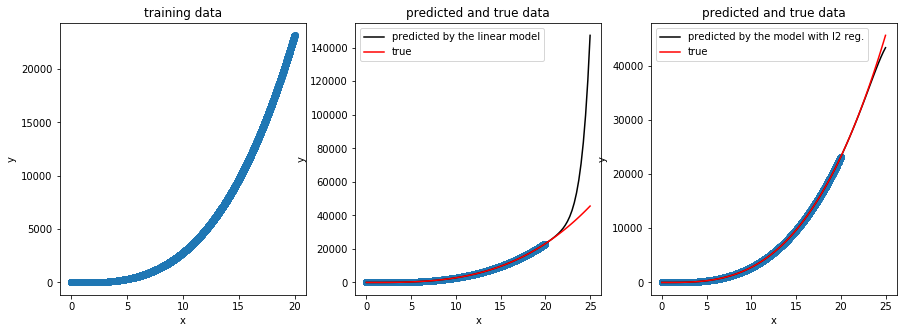

In [24]:
data = []
line = np.reshape(np.linspace(0, x.max()+5, 100), (100, 1))
linear_predict = f(line, linear_model)
y_predict = f(line, model)
y_true = f_true(line)

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 3, 1)
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("training data")
ax = fig.add_subplot(1, 3, 2)
ax.scatter(x, y)
ax.plot(line, linear_predict, c="black", label="predicted by the linear model")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()
ax = fig.add_subplot(1, 3, 3)
ax.scatter(x, y)
ax.plot(line, y_predict, c="black", label="predicted by the model with l2 reg.")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()

## Lasso Regression
- in this model, restriction of the weight's norm is employed.
- the loss function will be:
$$
loss = MSE(y_{pred}, y_{true}) + \alpha |\text{W}|
$$
- where $\text{W}$ is the weight of the model, and $\alpha$ controlls the level of regularization

In [25]:
# define parameters
training_num = 100
degree = 13

# data generation
x, y, x_test, y_test = data_generator(training_num)

# model prediction
linear_model, linear_pf = predict_polyreg(x, y, degree)
pf = PolynomialFeatures(degree=degree, include_bias=False)
model = Lasso(alpha=10, random_state=42)
x_ = pf.fit_transform(x)
model.fit(x_, y)

# get errors
train_error, test_error = get_errors(linear_pf, linear_model, x, y, x_test, y_test)
print(f"Linear: train error: {train_error}")
print(f"Linear: test  error: {test_error}")
print("")
train_error, test_error = get_errors(pf, model, x, y, x_test, y_test)
print(f"Lasso : train error: {train_error}")
print(f"Lasso : test  error: {test_error}")

Linear: train error: 0.8480716371118684
Linear: test  error: 48962.27108945276

Lasso : train error: 9094.353677648465
Lasso : test  error: 8881.051400844366


In [26]:
print("- coefficient of the original model")
coef_visualizer(linear_model)
print()
print("- coefficient of the model with regularization")
coef_visualizer(model)

- coefficient of the original model
coefficient 1 = 0.022882340016149232
coefficient 2 = 0.064060456709136
coefficient 3 = 0.22789220916549693
coefficient 4 = 0.4408414022492136
coefficient 5 = 0.428923993463419
coefficient 6 = -0.23155176187144144
coefficient 7 = 0.053824761256125044
coefficient 8 = -0.007286644375700558
coefficient 9 = 0.0006226024343080652
coefficient 10 = -3.4129688970418624e-05
coefficient 11 = 1.166920724439245e-06
coefficient 12 = -2.2692547769261745e-08
coefficient 13 = 1.9188041433526593e-10

- coefficient of the model with regularization
coefficient 1 = -145.84264813568095
coefficient 2 = 28.883156206990378
coefficient 3 = 0.8984378652403737
coefficient 4 = 0.026047960240673726
coefficient 5 = 0.0007340536491958143
coefficient 6 = 1.9495770734848104e-05
coefficient 7 = 4.5073120707217446e-07
coefficient 8 = 6.542227151631652e-09
coefficient 9 = -1.586446572616557e-10
coefficient 10 = -2.2461104297620386e-11
coefficient 11 = -1.5439049455921503e-12
coefficient

---

--> this tends to replace 0 on some weight parameters instead of reduce the norm of the parameter.

---

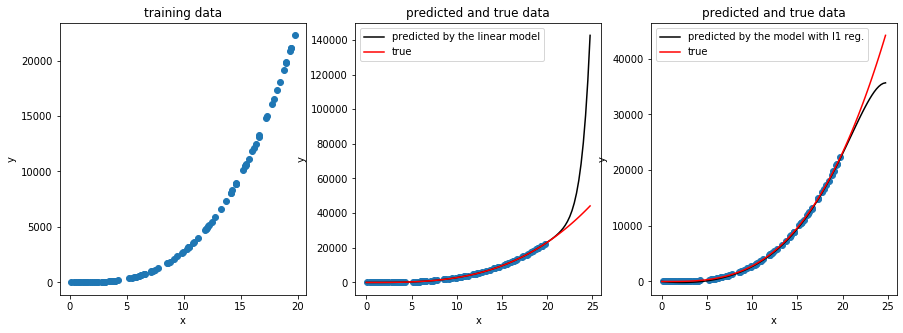

In [27]:
data = []
line = np.reshape(np.linspace(0, x.max()+5, 100), (100, 1))
linear_predict = f(line, linear_model)
y_predict = f(line, model)
y_true = f_true(line)

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 3, 1)
ax.scatter(x, y)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("training data")
ax = fig.add_subplot(1, 3, 2)
ax.scatter(x, y)
ax.plot(line, linear_predict, c="black", label="predicted by the linear model")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()
ax = fig.add_subplot(1, 3, 3)
ax.scatter(x, y)
ax.plot(line, y_predict, c="black", label="predicted by the model with l1 reg.")
ax.plot(line, y_true, c="red", label="true")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("predicted and true data")
plt.legend()

---

---> it seems to have better result in Lasso in this training set\
---> it is because this training set is sampled by $y=x^2$ so that it originally has an only one coef.\
---> thats why eliminating the weights is superior to reducing the weight-norm.

---

# Summary

- I have demonstrated the some problems of the machine learning, underfitting and overfitting.
- as a result, the importances of preventing those problems are as follows:
    - using big training dataset as possible.
    - using the model with moderate complexity.
    - using regularization
- I only used two regularization, but there are lots of regularization as well.